## Introduction

This project is a problem of supervised learning classification. The ultimate goal is to predict whether a client will have problems with the credit they have made with a third party, this will be modeled by a categorical variable (0 or 1). The dataset presents several data for each line representing a consumer (categorical, continuous and dates data). The dataset is highly unbalanced as we will see.

We have tried several classification algorithms and methods to avoid overfitting. We perform the data processing part to better serve the above algorithms.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

data = pd.read_csv("data/CreditTraining.csv")
data.head()

,Id_Customer,Y,Customer_Type,BirthDate,Customer_Open_Date,P_Client,Educational_Level,Marital_Status,Number_Of_Dependant,Years_At_Residence,...,Prod_Sub_Category,Prod_Decision_Date,Source,Type_Of_Residence,Nb_Of_Products,Prod_Category,Day(Prod_Closed_Date),Month(Prod_Closed_Date),Year(Prod_Closed_Date),Net_Annual_Income
0,7440,0,Non Existing Client,07/08/1977,13/02/2012,NP_Client,University,Married,3.0,1,...,C,14/02/2012,Sales,Owned,1,B,0,0,0,36
1,573,0,Existing Client,13/06/1974,04/02/2009,P_Client,University,Married,0.0,12,...,C,30/06/2011,Sales,Parents,1,G,0,0,0,18
2,9194,0,Non Existing Client,07/11/1973,03/04/2012,NP_Client,University,Married,2.0,10,...,C,04/04/2012,Sales,Owned,1,B,0,0,0,36
3,3016,1,Existing Client,08/07/1982,25/08/2011,NP_Client,University,Married,3.0,3,...,C,07/09/2011,Sales,New rent,1,L,12,31,2012,36
4,6524,0,Non Existing Client,18/08/1953,10/01/2012,NP_Client,University,Married,2.0,1,...,C,11/01/2012,Sales,Owned,1,D,0,0,0,36


In [3]:
print('Probability of having Y=1: ' + str(sum(data['Y']==1)/len(data) ) )
data.describe()

Probability of having Y=1: 0.07304832713754647


,Id_Customer,Y,Number_Of_Dependant,Years_At_Residence,Years_At_Business,Nb_Of_Products,Day(Prod_Closed_Date),Month(Prod_Closed_Date),Year(Prod_Closed_Date),Net_Annual_Income
count,5380.000000,5380.000000,5380.000000,5380.000000,5380.000000,5380.000000,5380.000000,5380.000000,5380.000000,5380.000000
mean,4784.535688,0.073048,1.058178,12.626022,4.264684,1.089033,1.338476,4.493866,439.137918,2635.775279
std,2781.436262,0.260240,1.338908,9.972164,7.225051,0.297587,2.981776,9.647812,831.269618,16887.691237
min,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,2368.500000,0.000000,0.000000,4.000000,1.000000,1.000000,0.000000,0.000000,0.000000,21.000000
50%,4762.500000,0.000000,0.000000,10.000000,1.000000,1.000000,0.000000,0.000000,0.000000,36.000000
75%,7180.250000,0.000000,2.000000,18.000000,4.000000,1.000000,0.000000,0.000000,0.000000,50.000000
max,9605.000000,1.000000,20.000000,70.000000,98.000000,3.000000,12.000000,31.000000,2013.000000,387906.000000


As we can see above the label we want to predict is highly unbalanced. Some approachs might be useful, such as using over sampling for the minority class (1) or under sampling for the majority class (0). This is to avoid overfitting and best estimates each model parameter.

We will split the data as much as we can and see to take as much information a possible. We may also add some features that will help our models, such as the client age when he did the credit contract, the gap years between the decision and the open date.

We performed some cluster algorithms and we added the cluster label as one more feature and hot encoding as well.

### Data Summary:

In this section we will find the importance of each feature individually to have Y=1.

* *Categorical features*: [Customer_Type, P_Client, Educational_Level, Marital_Status, Prod_Category, Prod_Sub_Category, Source, Type_Of_Residence]

* *Date Features*: [BirthDate, Customer_Open_Date, Prod_Decision_Date, Prod_Closed_Date]
all of them will be transformed in years gap, behaving as a numerical feature.

* Numerical Features: [Years_At_Residence, Net_Annual_Income, Years_At_Business, Number_Of_Dependant, Nb_Of_Products]

### Categorical variable

##### Key Takes

* **Customer_type**: Small diference for a given customer type. Not a great importance for the model.
* **P_Client**:  P_clients are less likely to receive Y=1.
* **Educational_Level**: Secondary or less educational level usually don't receive Y=1. Other categories are relatively balanced.
* **Marital_Status**: Not enough data to say the influence of Separated Marital Status to Y=1. Other categories seems to have some importance. Y=1 slightly more present on Single status.
* **Prod_Category**: High correlation between Prod Category and Y=1, especially for H, K and L. Negative correlation for categories C and D. No samples with Y=1 for Categories I and F, most likely negative correlation.
* **Prod_Sub_Category**: P sub category has almost no samples with Y=1. G has a very low percentage of y=1. C is most likely the sub product category most likely to have elements with Y=1. Very important feature.
* **Source**: slightly more propability of having Y=1 if Source equals 'Sales'.
* **Type_Of_Residence**: Significant positive probability difference for a residence of type new rent.

Percentage of Non Existing Client with y=1: 
0.07773512476007678
Percentage of Existing Client with y=1: 
0.08060182697474476


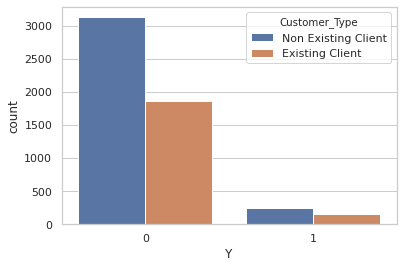

In [4]:
# Id_Customer: no relation to Y. 
CType = ['Non Existing Client', 'Existing Client']
for var in CType:
    print('Percentage of ' + var + ' with y=1: ')
    print(data[ data['Y'] == 1 ]['Customer_Type'].value_counts()[var] / data[ data['Y'] == 0 ]['Customer_Type'].value_counts()[var])

#Customer Type
sns.set(style="whitegrid")
g = sns.countplot(x="Y", hue='Customer_Type', data=data)

Percentage of P_Client with y=1: 
0.04040404040404041
Percentage of NP_Client with y=1: 
0.08211718579830102


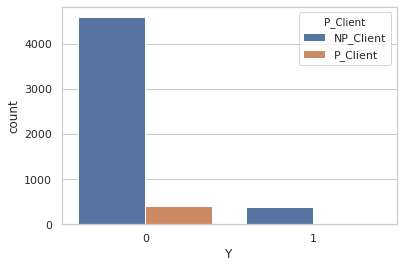

In [5]:
#P_Client
P = ['P_Client', 'NP_Client']
for p in P:
    print('Percentage of ' + p + ' with y=1: ')
    print(data[ data['Y'] == 1 ]['P_Client'].value_counts()[p] / data[ data['Y'] == 0 ]['P_Client'].value_counts()[p])
    
g = sns.countplot(x="Y", hue='P_Client', data=data)

Percentage of University with y=1: 
0.08160036166365281
Percentage of Master/PhD with y=1: 
0.058823529411764705
Percentage of Diploma with y=1: 
0.05454545454545454


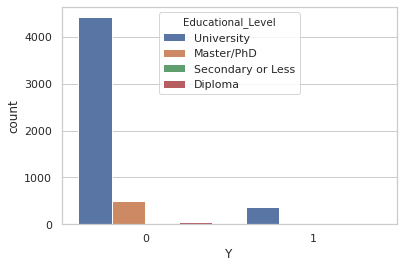

In [6]:
#Educational Level

Ed_level = ['University', 'Master/PhD', 'Diploma']
for ed in Ed_level:
    print('Percentage of ' + ed + ' with y=1: ')
    print(data[ data['Y'] == 1 ]['Educational_Level'].value_counts()[ed] / data[ data['Y'] == 0 ]['Educational_Level'].value_counts()[ed])
    
sns.set(style="whitegrid")
g = sns.countplot(x="Y", hue='Educational_Level', data=data)

Percentage of Married with y=1: 
0.0743295019157088
Percentage of Single with y=1: 
0.09758656873032528
Percentage of Widowed with y=1: 
0.06666666666666667
Percentage of Divorced with y=1: 
0.08620689655172414


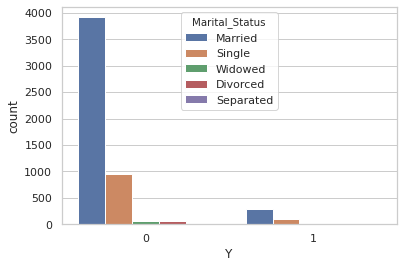

In [7]:
# Marital Status
feature = 'Marital_Status'
Var = ['Married', 'Single', 'Widowed', 'Divorced']
for var in Var:
    print('Percentage of ' + var + ' with y=1: ')
    print(data[ data['Y'] == 1 ][feature].value_counts()[var] / data[ data['Y'] == 0 ][feature].value_counts()[var])

#Customer Type
sns.set(style="whitegrid")
g = sns.countplot(x="Y", hue=feature, data=data)

Percentage of A with y=1: 
0.05555555555555555
total number of samples: 1

Percentage of B with y=1: 
0.07224848075624578
total number of samples: 214

Percentage of C with y=1: 
0.0465587044534413
total number of samples: 23

Percentage of D with y=1: 
0.046875
total number of samples: 30

Percentage of E with y=1: 
0.01
total number of samples: 1

Percentage of G with y=1: 
0.0053475935828877
total number of samples: 1

Percentage of H with y=1: 
0.16176470588235295
total number of samples: 11

Percentage of K with y=1: 
0.09504132231404959
total number of samples: 23

Percentage of L with y=1: 
0.5629139072847682
total number of samples: 85

Percentage of M with y=1: 
0.08888888888888889
total number of samples: 4



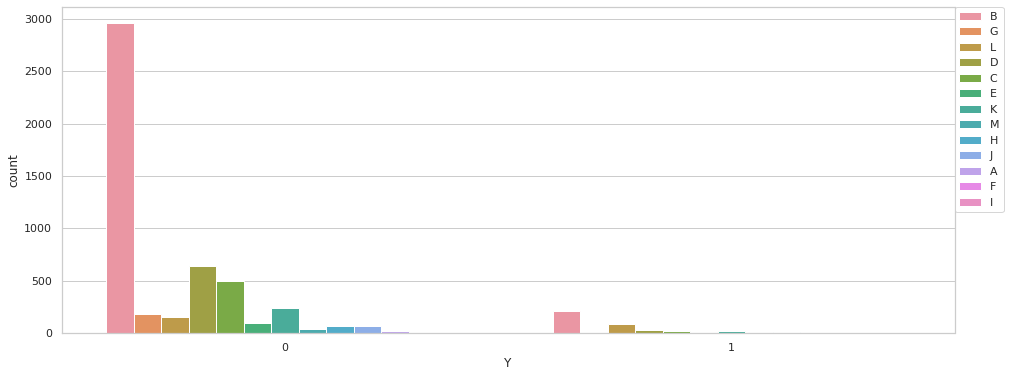

In [8]:
# Prod Category
feature = 'Prod_Category'
Var = ['A', 'B', 'C', 'D', 'E', 'G', 'H', 'K', 'L', 'M']
# F, I
for var in Var:
    print('Percentage of ' + var + ' with y=1: ')
    print(data[ data['Y'] == 1 ][feature].value_counts()[var] / data[ data['Y'] == 0 ][feature].value_counts()[var])
    print('total number of samples: '+ str(data[ data['Y'] == 1 ][feature].value_counts()[var]) + '\n')

#Customer Type
sns.set(style="whitegrid")
plt.figure(figsize=(16, 6))
g = sns.countplot(x="Y", hue=feature, data=data)
plt.legend(bbox_to_anchor=(1, 1), loc=2, borderaxespad=0.)

Percentage of C with y=1: 
0.08643710470836262
total number of samples: 369

Percentage of G with y=1: 
0.03826955074875208
total number of samples: 23

Percentage of P with y=1: 
0.008547008547008548
total number of samples: 1



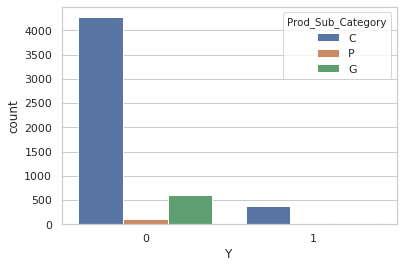

In [9]:
# Prod Sub Category
feature = 'Prod_Sub_Category'
Var = ['C', 'G', 'P']
# F, I
for var in Var:
    print('Percentage of ' + var + ' with y=1: ')
    print(data[ data['Y'] == 1 ][feature].value_counts()[var] / data[ data['Y'] == 0 ][feature].value_counts()[var])
    print('total number of samples: '+ str(data[ data['Y'] == 1 ][feature].value_counts()[var]) + '\n')

#Customer Type
sns.set(style="whitegrid")
g = sns.countplot(x="Y", hue=feature, data=data)

Percentage of Sales with y=1: 
0.08110236220472442
total number of samples: 309

Percentage of Branch with y=1: 
0.0713678844519966
total number of samples: 84



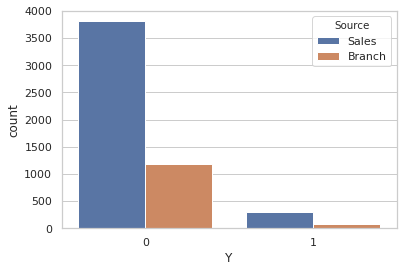

In [10]:
# Source
feature = 'Source'
Var = ['Sales', 'Branch']
# F, I
for var in Var:
    print('Percentage of ' + var + ' with y=1: ')
    print(data[ data['Y'] == 1 ][feature].value_counts()[var] / data[ data['Y'] == 0 ][feature].value_counts()[var])
    print('total number of samples: '+ str(data[ data['Y'] == 1 ][feature].value_counts()[var]) + '\n')

#Customer Type
sns.set(style="whitegrid")
g = sns.countplot(x="Y", hue=feature, data=data)

Percentage of Owned with y=1: 
0.07662921348314607
total number of samples: 341

Percentage of Old rent with y=1: 
0.09491525423728814
total number of samples: 28

Percentage of Parents with y=1: 
0.0718562874251497
total number of samples: 12

Percentage of New rent with y=1: 
0.16901408450704225
total number of samples: 12



<Figure size 576x432 with 0 Axes>

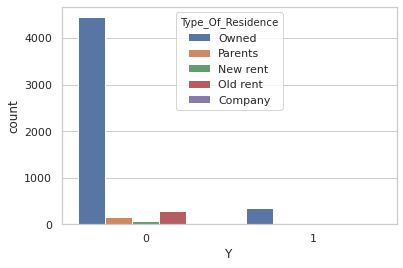

<Figure size 576x432 with 0 Axes>

In [11]:
# Type of residence
feature = 'Type_Of_Residence'
Var = ['Owned', 'Old rent', 'Parents', 'New rent']

for var in Var:
    print('Percentage of ' + var + ' with y=1: ')
    print(data[ data['Y'] == 1 ][feature].value_counts()[var] / data[ data['Y'] == 0 ][feature].value_counts()[var])
    print('total number of samples: '+ str(data[ data['Y'] == 1 ][feature].value_counts()[var]) + '\n')

#Customer Type
sns.set(style="whitegrid")
g = sns.countplot(x="Y", hue=feature, data=data)
plt.figure(figsize=(8, 6))

### Numerical and Date Features

* **BirthDate**:
* **Customer_Open_Date**:
* **Prod_Decision_Date**:
* **Prod_Closed_Date**:
* **Years_At_Residence**:
* **Net_Annual_Income**:
* **Years_At_Business**:
* **Number_Of_Dependant**:
* **Nb_Of_Products**:

In [12]:
data.columns
data['Type_Of_Residence'].value_counts()

Owned       4791
Old rent     323
Parents      179
New rent      83
Company        4
Name: Type_Of_Residence, dtype: int64

### Data Preparation

The code responsible for preparing the data can be found at the folder data/data_preparation.py (only by running them one will have the same outputs).
The initial file CreditTraining.csv must be in the folder data as well.

The date columns was split in day,month, and year. 
We added 3 clusters as new feature as well, in order to find similarities with an unsupervised way. We performed the clustering with different approach and dissimilarities to enlarge the possibilities and to catch the maximum of information among them.

$\bullet$ K-means clustering: $k$ = 2 and $k$ = 3

$\bullet$ Agglomerative CLustering clustering: Dissimilarity: Cosine, Euclidean

$\bullet$ DBSCAN: eps = 3

We found some improvement after adding this features.

In [13]:
final_data = pd.read_csv('data/data_final.csv')
final_data.columns 

Index(['Day(Prod_Closed_Date)', 'Month(Prod_Closed_Date)',
       'Year(Prod_Closed_Date)', 'Customer_Type_Existing Client',
       'Customer_Type_Non Existing Client', 'P_Client_NP_Client',
       'P_Client_P_Client', 'Educational_Level_Diploma',
       'Educational_Level_Master/PhD', 'Educational_Level_Secondary or Less',
       'Educational_Level_University', 'Marital_Status_Divorced',
       'Marital_Status_Married', 'Marital_Status_Separated',
       'Marital_Status_Single', 'Marital_Status_Widowed',
       'Prod_Sub_Category_C', 'Prod_Sub_Category_G', 'Prod_Sub_Category_P',
       'Source_Branch', 'Source_Sales', 'Type_Of_Residence_Company',
       'Type_Of_Residence_New rent', 'Type_Of_Residence_Old rent',
       'Type_Of_Residence_Owned', 'Type_Of_Residence_Parents',
       'Prod_Category_A', 'Prod_Category_B', 'Prod_Category_C',
       'Prod_Category_D', 'Prod_Category_E', 'Prod_Category_F',
       'Prod_Category_G', 'Prod_Category_H', 'Prod_Category_I',
       'Prod_Category_

In [14]:
final_data.corr()['Y']

Day(Prod_Closed_Date)                 0.494247
Month(Prod_Closed_Date)               0.590946
Year(Prod_Closed_Date)                0.474199
Customer_Type_Existing Client         0.004577
Customer_Type_Non Existing Client    -0.004577
                                        ...   
KMeans 3                              0.072309
Agglomerative Clustering Cosine      -0.003383
Agglomerative Clustering Euclidean    0.039087
DBSCAN eps = 3                        0.033245
Y                                     1.000000
Name: Y, Length: 64, dtype: float64

As we can see above we have several features were added. But still the closed date has a great impact on the label we want to predict. 

Below we can see what a ****PCA**** performed with StandardScaler. With 20 attributes we can have much of the information presented in the data set as seen in the variance ratio plot below.

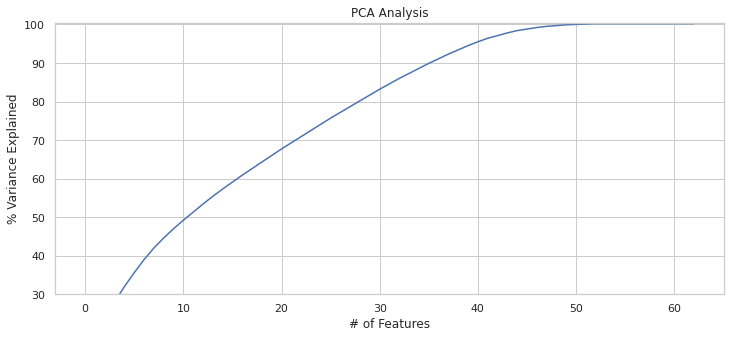

In [25]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
X = final_data.drop("Y", axis = 1)
y = final_data[["Y"]]

n_comp = len(X.T) #number of columnns (63)
columns = ["pca" +str(i+1) for i in range(n_comp)]
#Scale the attributes
scaled_features = StandardScaler().fit_transform(X.values)
scaled_features_df = pd.DataFrame(scaled_features, index = X.index, columns = X.columns)
#Perform the matrix decomposition
pca = PCA(n_components = n_comp)
pca.fit(scaled_features_df)

#plot the explained variance
variance = pca.explained_variance_ratio_
var = np.cumsum(np.round(pca.explained_variance_ratio_, decimals = 3) * 100)

plt.figure(figsize=(12,5))
plt.ylabel('% Variance Explained')
plt.xlabel('# of Features')
plt.title('PCA Analysis')
plt.ylim(30,100.5)
plt.style.context('seaborn-whitegrid')
plt.plot(var)

As we can see, with 35% of features we have 90% of the information approximatively. So when we performed PCA within the X dataset we have put 20 as the number of components (35%*63 $\sim$ 21)

### Models

We have tried several classification algorithms to perform the present task. For each classification we specified some details such as:

$\bullet$ Scale: if the observed attributes would be Standardized;

$\bullet$ PCA: if the model would receive the principal axis component as input.

$\bullet$ Over: if we would do Over Sampling in the training data (To balance the minority class, by duplicating its rows)

$\bullet$ Under: if we would do Under Sampling in the training data (To balance the minority class, by excluding or merging some rows of the most common class).

#### TPOT
With the evolution of automated methods for Machine Learning pipelines, we use TPOT to have an insight into which algorithm to use and the f1 score.
TPOT has a genetic search algorithm within to find the best parameters and model ensembles. It could also be thought of as a natural selection or evolutionary algorithm.

#### $\bullet$  AdaBoostClassifier

AdaBoost classifier is a meta-estimator that begins by fitting a classifier on the original dataset and then fits additional copies of the classifier on the same dataset but where the weights of incorrectly classified instances are adjusted such that subsequent classifiers focus more on difficult cases.
As seen in course the final estimmator is chosen among a group of possible estimators and then combined iteratively with the optimization of the loss function

#### $\bullet$ BaggingClassifier

A Bagging classifier is an ensemble meta-estimator that fits base classifiers each on random subsets of the original dataset and then aggregate their individual predictions (either by voting or by averaging) to form a final prediction.

#### $\bullet$ GradientBoostClassifier

A general approach that builds the model in a stage-wise fashion like other boosting methods do, and it generalizes them by allowing optimization of an arbitrary differentiable loss function. It allows us to see and test different loss functions. 

#### Trees and Forest Approachs
#### $\bullet$ ExtraTreesClassifier (Low Variance)

Extra Trees is like a Random Forest, in that it builds multiple trees and splits nodes using random subsets of features, but with two differences: it does not bootstrap observations (meaning it samples without replacement), and nodes are split on random splits, not best splits.

#### $\bullet$ DecisionTreeClassifier (High Variance)

It breaks down a dataset into smaller and smaller subsets while at the same time an associated decision tree is incrementally developed. The final result is a tree with decision nodes and leaf nodes.

#### $\bullet$ RandomForestClassifier (Medium Variance)

Random Forest uses decision trees with a depth of one or greater. The term random stems from the fact that we randomly sample the training set, and since we have a collection of trees.


##### Data used

The best Cross Validation output with the default hyperparameters were achived ****scaling**** the data and performing the ****sampling**** method to the training data (****under**** and ****over****, respectively). The summary of the performance of all methods can be found in *summary _____ .txt* files in the src folder.

The choice of models was made based on the algorithms and methodologies seen in the course. With the above algorithms we were able to perform the adjustment of hyperparameters many of which mentioned in the course, such as: the choice of the descending gradient optimization, the choice of the learning rate, regularization methods and adjustments in the loss function.

In [69]:
from tpot import TPOTClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score

data = pd.read_csv("data/data_final.csv")
X = data.drop("Y", axis = 1)
y = data[["Y"]]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

tpot = TPOTClassifier(generations = 5, population_size = 20, cv = 3, verbosity=2, scoring = 'f1')

tpot.fit(X_train, y_train)
tpot.score(X_test, y_test)

/home/joao/.local/lib/python3.7/site-packages/sklearn/utils/validation.py:744: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Generation 1 - Current best internal CV score: 0.7697729454643077
Generation 2 - Current best internal CV score: 0.7697729454643077
Generation 3 - Current best internal CV score: 0.7697729454643077
Generation 4 - Current best internal CV score: 0.7697729454643077
Generation 5 - Current best internal CV score: 0.7719171542090484

Best pipeline: GradientBoostingClassifier(MinMaxScaler(MinMaxScaler(input_matrix)), learning_rate=0.1, max_depth=8, max_features=0.8500000000000001, min_samples_leaf=20, min_samples_split=18, n_estimators=100, subsample=1.0)


/home/joao/.local/lib/python3.7/site-packages/sklearn/utils/validation.py:744: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


0.6885245901639344

As we can see the TPOT has found a Gradient BoostClassifier for this task. We have used the F1 - score as the target to maximize, since we hope to get both Precision and Recall as high as possible, but without any preference between thm.

In [70]:
from sklearn.metrics import f1_score, accuracy_score, precision_score, recall_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import precision_recall_fscore_support as score
from sklearn.model_selection import cross_val_predict, cross_val_score
from sklearn.model_selection import GridSearchCV
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import RandomOverSampler
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.decomposition import PCA

##################################################################################################

##Classifiers
from sklearn.ensemble import AdaBoostClassifier #begins by fitting a classifier on the original dataset and then fits additional copies of the classifier on the same dataset but where the weights of incorrectly classified instances are adjusted
from sklearn.ensemble import BaggingClassifier #Bagging classifier fits base classifiers each on random subsets of the original dataset and aggregate their individual predictions
from sklearn.ensemble import ExtraTreesClassifier #Extremely Random Trees: This class implements a meta estimator that fits a number of randomized decision trees (a.k.a. extra-trees) on various sub-samples of the dataset and uses averaging to improve the predictive accuracy and control over-fitting
from sklearn.ensemble import GradientBoostingClassifier #GB builds an additive model in a forward stage-wise fashion; it allows for the optimization of arbitrary differentiable loss functions
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import SGDClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier #Classifier implementing the k-nearest neighbors vote.
from sklearn.ensemble import VotingClassifier

In [72]:
# Data Preparation Parameters

data = pd.read_csv("data/data_final.csv")
X = data.drop("Y", axis = 1)
y = data[["Y"]]
y = y.values.ravel()


scale = False #Standad Scaler
pca = False
n_comp = 20
over = False
under = False

In [73]:
#Data Preparation 

if scale:        
    scaled_features = StandardScaler().fit_transform(X.values)
    X = pd.DataFrame(scaled_features, index = X.index, columns = X.columns)
    
    
if pca:
    columns = ["pca" +str(i+1) for i in range(n_comp)]
            
    scaled_features = MinMaxScaler().fit_transform(X.values)
    scaled_features_df = pd.DataFrame(scaled_features, index = X.index, columns = X.columns)
    
    pca = PCA(n_components = n_comp)
    pca.fit(scaled_features_df)
    
    X = pca.transform(scaled_features_df)
    X = pd.DataFrame(X)
    X.columns = columns
                 
        
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state = 0)
  
    
if over:
    ros = RandomOverSampler(sampling_strategy = 'minority')
    X_train, y_train = ros.fit_resample(X_train, y_train)
    
if under:
    rus = RandomUnderSampler(sampling_strategy = 'majority')
    X_train, y_train = rus.fit_resample(X_train, y_train)

In [74]:
# Classification Models
print("Summary for classifiers -- CV = 3")

clf = [
            [AdaBoostClassifier(), "AdaBoostClassifier"],
            [BaggingClassifier(), "BaggingClassifier"],
            [ExtraTreesClassifier(), "ExtraTreesClassifier"],
            [GradientBoostingClassifier(), "GradientBoostClassifier"],
            [DecisionTreeClassifier(), "DecisionTreeClassifier"],
            [RandomForestClassifier(), "RandomForestClassifier"]
        ]

performance_train = {}
performance_test = {}
performance_cv = {}
    
for classifier, clf_name in clf: performance_train[clf_name] = []
for classifier, clf_name in clf: performance_test[clf_name] = []
for classifier, clf_name in clf: performance_cv[clf_name] = []

for elem in clf: #Use each classifier in clf
    classifier = elem[0]
    classifier_name = elem[1]
    print(classifier_name)
        
    try:    
        classifier.fit(X_train, y_train)
            
        y_hat = classifier.predict(X_train)
        #Train Scores:
        f1_train = f1_score(y_train, y_hat)
        accuracy_train = accuracy_score(y_train, y_hat)
        precision_train = precision_score(y_train, y_hat)
        recall_train = recall_score(y_train, y_hat)
        roc_auc_train = roc_auc_score(y_train, y_hat)
        #Print train Scores
        print(f"Train scores: \nf1-score: {round(f1_train,3)}\tAccuracy: {round(accuracy_train, 3)}\tPrecision: {round(precision_train,3)}\tRecall: {round(recall_train,3)}\tROC-AUC: {round(roc_auc_train,3)}")
        #Sava train scors for comparison
        performance_train[classifier_name].append(f1_train)
        performance_train[classifier_name].append(accuracy_train)
        performance_train[classifier_name].append(precision_train)
        performance_train[classifier_name].append(recall_train)
        performance_train[classifier_name].append(roc_auc_train)
           
        y_pred = classifier.predict(X_test)
        #Test scores
        f1_test = f1_score(y_test, y_pred)
        accuracy_test = accuracy_score(y_test, y_pred)
        precision_test = precision_score(y_test, y_pred)
        recall_test = recall_score(y_test, y_pred)
        roc_auc_test = roc_auc_score(y_test, y_pred)
        #Print test scores          
        print(f"Test scores: \nf1-score: {round(f1_test,3)}\tAccuracy: {round(accuracy_test,3)}\tPrecision: {round(precision_test,3)}\tRecall: {round(recall_test,3)}\tROC-AUC: {round(roc_auc_test,3)}")
          #Save test scores
        performance_test[classifier_name].append(f1_test)
        performance_test[classifier_name].append(accuracy_test)
        performance_test[classifier_name].append(precision_test)
        performance_test[classifier_name].append(recall_test)
        performance_test[classifier_name].append(roc_auc_test)
            
            #Cross validation
        y_cv = cross_val_predict(classifier, X, y, cv = 3)
        #CV scores
        f1_cv = f1_score(y, y_cv)
        accuracy_cv = accuracy_score(y, y_cv)
        precision_cv = precision_score(y, y_cv)
        recall_cv = recall_score(y, y_cv)
        roc_auc_cv = roc_auc_score(y, y_cv)
        #Print CV scores
        print(f"CV scores: \nf1-score: {round(f1_cv,3)}\tAccuracy: {round(accuracy_cv,3)}\tPrecision: {round(precision_cv,3)}\tRecall: {round(recall_cv,3)}\tROC-AUC: {round(roc_auc_cv,3)}")
        #Save CV scores
        performance_cv[classifier_name].append(f1_cv)
        performance_cv[classifier_name].append(accuracy_cv)
        performance_cv[classifier_name].append(precision_cv)
        performance_cv[classifier_name].append(recall_cv)
        performance_cv[classifier_name].append(roc_auc_cv)

        print("\n**********************************************************************")
    except ImportError:
        print("Classifier \"" + classifier_name + "failed.")
print("End")

Summary for classifiers -- CV = 3
AdaBoostClassifier
Train scores: 
f1-score: 0.75	Accuracy: 0.967	Precision: 0.814	Recall: 0.696	ROC-AUC: 0.842
Test scores: 
f1-score: 0.776	Accuracy: 0.968	Precision: 0.868	Recall: 0.702	ROC-AUC: 0.847
CV scores: 
f1-score: 0.695	Accuracy: 0.958	Precision: 0.741	Recall: 0.654	ROC-AUC: 0.818

**********************************************************************
BaggingClassifier
Train scores: 
f1-score: 0.973	Accuracy: 0.996	Precision: 1.0	Recall: 0.948	ROC-AUC: 0.974
Test scores: 
f1-score: 0.765	Accuracy: 0.967	Precision: 0.877	Recall: 0.679	ROC-AUC: 0.835
CV scores: 
f1-score: 0.731	Accuracy: 0.966	Precision: 0.851	Recall: 0.641	ROC-AUC: 0.816

**********************************************************************
ExtraTreesClassifier
Train scores: 
f1-score: 1.0	Accuracy: 1.0	Precision: 1.0	Recall: 1.0	ROC-AUC: 1.0
Test scores: 
f1-score: 0.71	Accuracy: 0.963	Precision: 0.907	Recall: 0.583	ROC-AUC: 0.789
CV scores: 
f1-score: 0.669	Accuracy: 0.961

From the text books and other sources, the ****ROC - AUC Score(best CV: $\sim$ .832)**** and ****F1 (best CV: $\sim$ .784)**** are both good for this classification task. The classifiers have well learned the information within the data. The ensemble methods have achived abetter score than the tree methods.

The optimization of the above methods didn't have a big improvement, so we omitted it in the notebook, but we can find it in the optimizer.py code in the src folder. The result is in /prune.txt/ with the respective hyperparameters.

#### XGBoost
We have pruned an XGBoost model as weel in order to perform the classification task. Because as wee can see above, Gradient Boosting and AdaBoost model have a good performance in the dataset.

$\bullet$ XGBoost has many advantages since it can be conseidered a regularized version of Gradient Boosting methods and we can easily control its hyperparametrs.

$\bullet$ XGBoost has in-built L1 (Lasso Regression) and L2 (Ridge Regression) regularization which prevents the model from overfitting. 

$\bullet$ XGBoost utilizes the power of parallel processing and that is why it is faster than GBM to prune.

$\bullet$ XGBoost allows user to run a cross-validation at each iteration of the boosting process and thus it is easy to get the exact optimum number of boosting iterations in a single run. 

$\bullet$ A Gradient Boosting algorithm would stop splitting a node when it encounters a negative loss in the split (it can no longer optimize),like a greedy algorithm. XGBoost on the contrary, make splits upto the max_depth specified and then start pruning the tree backwards and remove splits beyond which there is no positive gain.

Running the cells bellow the best parameters we could found for XGBoost were:

    1. best_colsample_bytree = 0.7
    2. best_subsample = 1.0
    3. best_max_depth = 5
    4. best_min_child_weight = 3
    5. best_gamma = 0.3
    6. best_reg_lambda = 0.5
    7. best_reg_alpha = 0.1
    8. LearningRate = 0.07

In [53]:
import xgboost

from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import f1_score
from sklearn.metrics import classification_report
from sklearn.model_selection import GridSearchCV
from xgboost import XGBClassifier



def XGB(LR = 0.1, n_est = 1000, max_d = 5, min_c = 1, gm = 0, colsample = 0.8, subs = 1, lambd = 0, alpha = 0):
   
    xgb1_model = XGBClassifier( learning_rate=LR, 
                                            n_estimators=n_est,
                                            max_depth=max_d,
                                            min_child_weight=min_c,                         
                                            gamma=min_c,
                                            colsample_bytree=colsample,
                                            subsample=subs,
                                            objective ='binary:logistic',                   
                                            reg_lambda=lambd,
                                            reg_alpha=alpha,
                                            scale_pos_weight = 1,
                                            seed=42)


    xgb1_model.fit(X_train,y_train)
    y_predicted = xgb1_model.predict(X_test)
    y_predicted_train = xgb1_model.predict(X_train)


    print('performance over the training set: ' + str(f1_score(y_train, y_predicted_train)))
    print('performance over the test set: ' + str(f1_score(y_test, y_predicted)) + '\n')
    print(classification_report(y_test, y_predicted))
    
    
    
def XGBCV(LR = 0.1, n_est = 1000, max_d = 5, min_c = 1, gm = 0, colsample = 0.8, subs = 1, lambd = 0, alpha = 0):
   
    xgb1_model = XGBClassifier( learning_rate=LR, 
                                            n_estimators=n_est,
                                            max_depth=max_d,
                                            min_child_weight=min_c,                         
                                            gamma=min_c,
                                            colsample_bytree=colsample,
                                            subsample=subs,
                                            objective ='binary:logistic',                   
                                            reg_lambda=lambd,
                                            reg_alpha=alpha,
                                            scale_pos_weight = 1,
                                            seed=42)


    # CV model
    kfold = KFold(n_splits=5, random_state=42, shuffle=True)
    results = cross_val_score(xgb1_model, X, y, cv=kfold, scoring="f1")
    print(results)
    print("f1-score: %.2f%% (%.2f%%)" % (results.mean()*100, results.std()*100))
    
    
    
def XGB_tuning (LR = 0.1, n_est = 1000, max_d = 5, min_c = 1, gm = 0, colsample = 0.8, subs = 1,
                lambd = 0, alpha = 0, param_test = {'learning_rate':[i/100.0 for i in range(5,20,2)]} ):
    
    gsearch = GridSearchCV(estimator = XGBClassifier( learning_rate=LR, 
                                                    n_estimators=n_est,
                                                    max_depth=max_d,
                                                    min_child_weight=min_c,                         
                                                    gamma=min_c,
                                                    colsample_bytree=colsample,
                                                    subsample = subs,
                                                    objective ='binary:logistic',
                                                    reg_lambda=lambd,
                                                    reg_alpha=alpha,
                                                    scale_pos_weight = 1,
                                                    seed=42), 
                            param_grid = param_test, 
                            scoring='f1',
                            n_jobs=4, 
                            cv=5)


    gsearch.fit(X_train, y_train)
    return gsearch

In [54]:
# STEP 1 - First XGB - Highly Overfitted
LearningRate = 0.1
n_estimators = 1000

# Fix Learning Rate and n_estimators
XGB(LearningRate, n_estimators)

performance over the training set: 0.9918433931484503
performance over the test set: 0.7972972972972973

              precision    recall  f1-score   support

           0       0.98      0.99      0.99       992
           1       0.92      0.70      0.80        84

    accuracy                           0.97      1076
   macro avg       0.95      0.85      0.89      1076
weighted avg       0.97      0.97      0.97      1076



In [55]:
XGBCV(0.1, 1000)

[0.76510067 0.72058824 0.78911565 0.69117647 0.73282443]
f1-score: 73.98% (3.42%)


In [57]:
# STEP 2 - Tuning max_depth and min_child_weight

parameters_test = {
    'max_depth':range(3,7,2),
    'min_child_weight':range(3,7,2)
}

gsearch2 = XGB_tuning (LR = LearningRate, n_est = n_estimators, param_test=parameters_test)
best_max_depth, best_min_child_weight = gsearch2.best_params_['max_depth'], gsearch2.best_params_['min_child_weight']
print(gsearch2.best_params_, gsearch2.best_score_)

{'max_depth': 5, 'min_child_weight': 3} 0.7503685564968547


In [50]:
# STEP 3 - Tuning Gamma 
parameters_test = { 
    'gamma':[i/10.0 for i in range(0,5)] 
}

gsearch3 = XGB_tuning (LR = LearningRate, n_est = n_estimators, max_d=best_max_depth, min_c= best_min_child_weight,
                      param_test=parameters_test)
best_gamma = gsearch3.best_params_['gamma']
print(gsearch3.best_params_, gsearch3.best_score_)

{'gamma': 0.3} 0.7483729741474316


{'gamma': 0.3} 0.7483729741474316


In [51]:
# STEP 4 - Tuning colsample_bytree and subsaample
parameters_test = {
    'colsample_bytree':[i/10.0 for i in range(7,11)],
    'subsample':[i/10.0 for i in range(7,11)]
}

gsearch4 = XGB_tuning (LR = LearningRate, n_est = n_estimators, max_d = best_max_depth, min_c = best_min_child_weight,
                      gm = best_gamma, param_test=parameters_test)
best_colsample_bytree, best_subsample = gsearch4.best_params_['colsample_bytree'], gsearch4.best_params_['subsample']
print(gsearch4.best_params_, gsearch4.best_score_)

{'colsample_bytree': 0.7, 'subsample': 1.0} 0.7515131438901536


In [62]:
# STEP 5 - Tuning Regularization Parameters
# Lambda L2 Regularization
# Ampha L1 Regularization

parameters_test = {
    'reg_lambda':[1e-2, 0.1, 0.5, 1, 2, 10],
    'reg_alpha':[1e-2, 0.1, 0.5, 1, 2, 10],
}

gsearch5 = XGB_tuning (LR = LearningRate, n_est = n_estimators, max_d = best_max_depth, 
                       min_c = best_min_child_weight, gm = best_gamma,  colsample = best_colsample_bytree, 
                       subs = best_subsample, param_test=parameters_test)

best_reg_lambda, best_reg_alpha = gsearch5.best_params_['reg_lambda'], gsearch5.best_params_['reg_alpha']
print(gsearch5.best_params_, gsearch5.best_score_)

{'reg_alpha': 0.1, 'reg_lambda': 0.5} 0.7617422942980404


In [59]:
# Closer Look
parameters_test = {
    'reg_lambda':[best_reg_lambda*0.8, best_reg_lambda, best_reg_lambda*1.2, best_reg_lambda*1.5],
    'reg_alpha':[best_reg_alpha*0.8, best_reg_alpha, best_reg_alpha*1.2, best_reg_alpha*1.5]
}

gsearch5 = XGB_tuning (LR = LearningRate, n_est = n_estimators, max_d = best_max_depth, min_c = best_min_child_weight,
                       gm = best_gamma,  colsample = best_colsample_bytree, subs = best_subsample, 
                       param_test=parameters_test)

best_reg_lambda, best_red_alpha = gsearch5.best_params_['reg_lambda'], gsearch5.best_params_['reg_alpha']
print(gsearch5.best_params_, gsearch5.best_score_)

{'reg_alpha': 0.1, 'reg_lambda': 0.5} 0.7617422942980404


In [60]:
# # STEP 6 - Reducing Learning Rate and Adding More Trees
n_estimators *= 10
parameters_test = {
    'learning_rate':[i/100.0 for i in range(2,10)]
}

gsearch6 = XGB_tuning (LR = LearningRate, n_est = n_estimators, max_d = best_max_depth, min_c = best_min_child_weight,
                       gm = best_gamma,  colsample = best_colsample_bytree, subs = best_subsample, 
                       lambd = best_reg_lambda, alpha = best_reg_alpha, param_test=parameters_test)

LearningRate = gsearch6.best_params_['learning_rate']
print(gsearch6.best_params_, gsearch6.best_score_)

{'learning_rate': 0.07} 0.7550717066772693


In [61]:
# Testing new parameters - complete dataset with cross validation
XGBCV(LearningRate, n_estimators, best_max_depth, best_min_child_weight, best_gamma, 
      best_colsample_bytree, best_subsample, best_reg_lambda, best_reg_alpha)

# Testing new parameters - testing set (not influenced by tuning)
XGB(LearningRate, n_estimators, best_max_depth, best_min_child_weight, best_gamma, 
      best_colsample_bytree, best_subsample, best_reg_lambda, best_reg_alpha)

[0.76190476 0.71212121 0.78911565 0.73758865 0.72727273]
f1-score: 74.56% (2.71%)
performance over the training set: 0.8916083916083917
performance over the test set: 0.7891156462585033

              precision    recall  f1-score   support

           0       0.97      0.99      0.98       992
           1       0.92      0.69      0.79        84

    accuracy                           0.97      1076
   macro avg       0.95      0.84      0.89      1076
weighted avg       0.97      0.97      0.97      1076



## Conclusion

The classification study with the above methods showed us how the preparation of data and the correct use of good algorithms can be useful in such tasks. We tuned the hyperparameters, but one can spot not a very significant improvement for the test validation. This may be due to the amount of information present in the dataset and the small sample of one class with respect to another. 

The balance of classes using the technique of over and under sampling allowed us to obtain better results. The XGBoost obtained a good performance using the data set raw , as well as the tpot. Showing the possibility and flexibility of such approachs with varied data.

Both F1 Score and AUC-OC Score were in the neighborhood of 0.8

